In [52]:
import pandas as pd

# Load your data
df = pd.read_csv('survey_results_public.csv')


In [41]:
# Print the column names all of them, without truncation
pd.set_option('display.max_columns', None)
# Columns with starting with Language
df.filter(like='Language').head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired
0,NaN,NaN,NaN
1,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,C#,C#,C#
3,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python


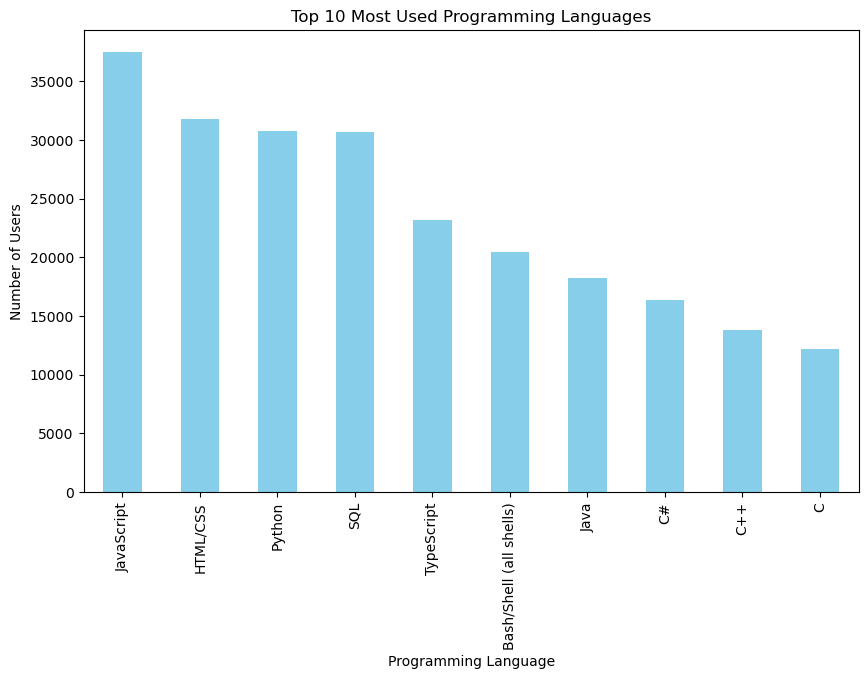

In [44]:
# Strip whitespace from each language value
df_cleaned = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df_cleaned['Language'] = df_cleaned['Language'].str.strip()

df_cleaned = df_cleaned[df_cleaned['Language'] != 'NA']
df_cleaned = df_cleaned.dropna(subset=['Language'])

## Export to CSV (only the Language column and the Respondent column)
df_cleaned[['ResponseId', 'Language']].to_csv('languages_used.csv', index=False)
## Visualize Lanugage and how much they are used
import matplotlib.pyplot as plt

# Count the number of occurrences of each language
language_counts = df_cleaned['Language'].value_counts()

# Plot the top 10 most popular languages
plt.figure(figsize=(10, 6))
language_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.title('Top 10 Most Used Programming Languages')
plt.show()

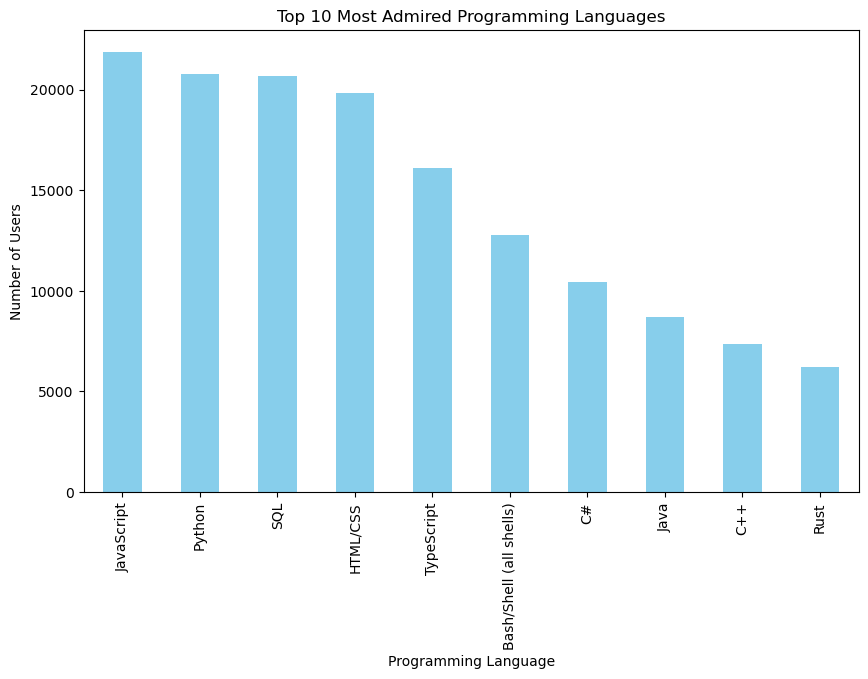

In [45]:
# Strip whitespace from each language value
df_cleaned = df.assign(Language=df['LanguageAdmired'].str.split(';')).explode('Language')
df_cleaned['Language'] = df_cleaned['Language'].str.strip()

df_cleaned = df_cleaned[df_cleaned['Language'] != 'NA']
df_cleaned = df_cleaned.dropna(subset=['Language'])
## Visualize Lanugage and how much they are used
df_cleaned[['ResponseId', 'Language']].to_csv('languages_admired.csv', index=False)

import matplotlib.pyplot as plt

# Count the number of occurrences of each language
language_counts = df_cleaned['Language'].value_counts()

# Plot the top 10 most popular languages
plt.figure(figsize=(10, 6))
language_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.title('Top 10 Most Admired Programming Languages')
plt.show()

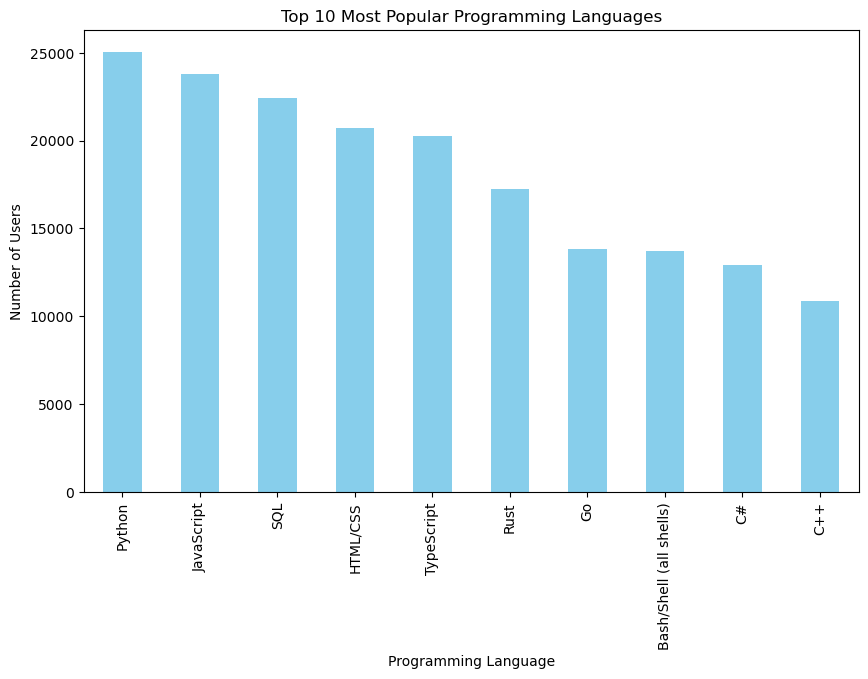

In [46]:
# Strip whitespace from each language value
df_cleaned = df.assign(Language=df['LanguageWantToWorkWith'].str.split(';')).explode('Language')
df_cleaned['Language'] = df_cleaned['Language'].str.strip()

df_cleaned = df_cleaned[df_cleaned['Language'] != 'NA']
df_cleaned = df_cleaned.dropna(subset=['Language'])
## Visualize Lanugage and how much they are used
df_cleaned[['ResponseId', 'Language']].to_csv('languages_popular.csv', index=False)

import matplotlib.pyplot as plt

# Count the number of occurrences of each language
language_counts = df_cleaned['Language'].value_counts()

# Plot the top 10 most popular languages
plt.figure(figsize=(10, 6))
language_counts.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Number of Users')
plt.title('Top 10 Most Popular Programming Languages')
plt.show()

In [56]:
df["Frustration"].dropna()

10       Amount of technical debt;Number of software to...
12       Amount of technical debt;Complexity of tech st...
15       Amount of technical debt;Complexity of tech st...
18       Amount of technical debt;Tracking my work;Comp...
20       Number of software tools in use;Tracking my wo...
                               ...                        
65241    Amount of technical debt;Showing my contributi...
65265    Tracking my work;Complexity of tech stack for ...
65268                                        None of these
65351    Complexity of tech stack for deployment;Comple...
65412    Amount of technical debt;Reliability of tools/...
Name: Frustration, Length: 28251, dtype: object

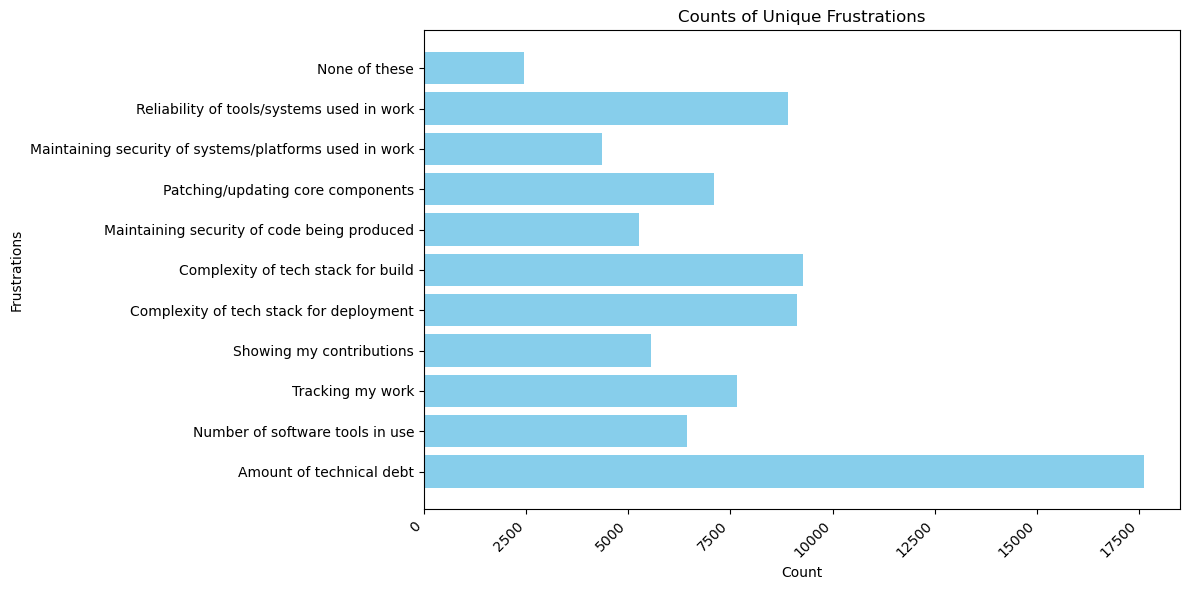

In [57]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a Counter to store the counts of frustrations
frustration_counts = Counter()

# Iterate over each value in the "Frustration" column
for frustrations in df['Frustration'].dropna():
    # Split the string by ';' and update the count for each frustration
    for frustration in frustrations.split(';'):
        frustration = frustration.strip()  # Remove extra spaces
        if frustration:  # Check if frustration is not empty
            frustration_counts[frustration] += 1

# Export the counts to a CSV file
frustration_counts_df = pd.DataFrame(frustration_counts.items(), columns=['Frustration', 'Count'])
frustration_counts_df.to_csv('frustration_counts.csv', index=False)


# Prepare data for plotting
labels, counts = zip(*frustration_counts.items())  # Unzipping into two lists

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Frustrations')
plt.title('Counts of Unique Frustrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for labels

# Show the plot
plt.show()
